In this notebook, we are going to explore how to preprocess tweets for sentiment Analysis. Moreover, we will try to discover NLTK package to perform a a preprocessing pipeline for Twitter datasets.

**NLTK** is an opensource library for Natural Language processing. It has dedicated modules for collecting, handling and processing twitter data.

In [10]:
import nltk                              # python library for NLP
from nltk.corpus import twitter_samples  # sample twitter dataset from NLTK
import matplotlib.pyplot as plt          # visualisation library
import random 

%matplotlib inline
# for pseudo random number generator

# About the Twitter Dataset

The sample dataset from NLTk is separated into positive and negative tweets. It contains 5000 positive and 5000 Negative tweets exactly. The exact match between the classes is not a coincidence, it is created intentionally to have a balanced dataset. However, this does not reflect the real twitter data stream. Balanced datasets are easy to process and create inference.

To download the dataset into your notebook or local machine, you can run the following code.

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to C:\Users\MRUTYUNJAY
[nltk_data]     BISWAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

We can load the text fields of the positive and negative tweets by using the module's stirng method as following.

In [4]:
# select the set of pos and neg tweets
all_pos_tweets = twitter_samples.strings('positive_tweets.json')
all_neg_tweets = twitter_samples.strings('negative_tweets.json')

So, let's see how many have we got? Let's print the tweets and their length and type. Its essential to know the format or sructure of the data you are playing with.

In [9]:
print(f"We have got {len(all_pos_tweets)} positive tweets")
print(f"We have got {len(all_neg_tweets)} negative tweets")

print(f"The type of all_pos_tweets/all_neg_tweets is {type(all_neg_tweets)}")
print(f"Tweets are given in the form of {type(all_pos_tweets[0])}")

We have got 5000 positive tweets
We have got 5000 negative tweets
The type of all_pos_tweets/all_neg_tweets is <class 'list'>
Tweets are given in the form of <class 'str'>


As we can see, the data is perfectly balanced i.e 5000 samples in each class. And all the tweets are stored as type `string` in a `list.

We can make a more visual representation of our data representation. Let's see how we can create a pie chart using matplotlib library. This snippet will be very useful while analysing this kind of data in future.

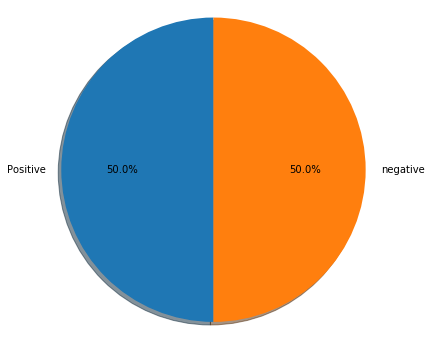

In [12]:
# Declare a fig with custom size
fig = plt.figure(figsize=(6, 6))

# define labels for our classes
labels = ('Positive', 'negative')

# sizes of each slide
sizes = [len(all_pos_tweets), len(all_neg_tweets)]

# declare the pie chart where the slices will be ordered and plotted counter-clockwise
plt.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
# the argument details can be found on the official documentation of matplotlib
# equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis('equal')

# display the chart
plt.show()

# Examining the raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for $80\%$ of the success or failure in data science projects. We can use this time to observe the aspects we would like to consider when preprocessing our data.

In [13]:
# for convenience, I am adding color specifications to it
print('\033[92m' + all_pos_tweets[random.randint(0, len(all_pos_tweets))])
print('\033[91m' + all_neg_tweets[random.randint(0, len(all_neg_tweets))])

@sambirdracing Hell yes!! Will be at Donington Park on 24/25 hoping to see you and the team again! Season 2 is OURS :D @VirginRacingFE
:( now im feeling lonely wth https://t.co/6NrxEGjSv3


The major take away could be: the tweets may contain emoticons and hyperlinks as well. This info will come handy in the next steps, stick in :)

# Preprocessing raw texts for Sentiment Analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning model. For NLP, the initial processing steps are comprised of the following steps.

- Tokenizing the text data
- Lowercasing
- Removing stop words and punctuation
- Stemming and/or Lemmatization

In [14]:
# let's just pick one example and understand all of the steps above
tweet = all_pos_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


So our example contains emoticons and urls too.

In [15]:
# let's import some libraries as per our requirement
import re                                 # lib for regular expression operations
import string                             # lib for string operations

from nltk.corpus import stopwords         # module for stop word removal that comes with NLTK
from nltk.stem import PorterStemmer       # module for stemming
from nltk.tokenize import TweetTokenizer  # module for tokenizing strings

## Remove hyperlinks, Twitter marks and styles

Since we have a twitter dataset, we would like to remove some substrings commonly used on the platform like the hashtag, retweet marks and hyperlinks. We will use the `re` library to perform regular expression operations on our tweet. We will define our search pattern and use the `sub()` method to remove matches by substituting with an empty charachter.(i.e ' ')

In [18]:
print('\033[92m' + tweet)
print('\033[94m')  # adds an aditional new line

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# let's understand the pattern
# ^RT means tweets starting from RT keyword
# [\s]+ means the characters matching after RT
# and replace the pattern with an empty string

# now remove hashtags
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… https://t.co/3tfYom0N1i


## Tokenize the string

To tokenize the strings means to split the string into individual words without blanks or tabs. In the same step, we will also convert each word in the string to lower case. The `tokenize` module from NLTK does the work for us.

In [24]:
print()
print('\033[92m' + tweet)
print('\033[94m')

# instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False,
                          strip_handles=True,
                          reduce_len=True)

# tokenize the tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print("Tokenized string: \n")
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Tokenized string: 

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…', 'https://t.co/3tfYom0N1i']


## Remove Stop words and Punctuations

The next step is to remove the stop words and punctuations. `Stop words` are words those do not bring any significant meaning to the text.

In [26]:
# import the english stop words list from nltk
stopwords_en = stopwords.words('english')

print('Stop words: \n')
print(stopwords_en)

print('\nPunctuations: \n')
print(string.punctuation)

Stop words: 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

We can see that the stop words listed above contains some words that could be important in some contexts. These could be words like _i, not, between, because_. We might need to customize the list of stop words for some applications, for now, lets move ahead.

For the punctuation, we saw earlier that `:)` like ones contains sentiment, so we are gonna retain them. For other applicaions like medical analysis, we can remove such tokens from our vocab.

Time to clean up our tokenized tweets.

In [27]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

cleaned_tweets = []

for word in tweet_tokens:
    if (word not in stopwords_en) and (word not in string.punctuation):
        cleaned_tweets.append(word)
        
print('Removed stop words and Punctuation: ')
print(cleaned_tweets)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…', 'https://t.co/3tfYom0N1i']

Removed stop words and Punctuation: 
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…', 'https://t.co/3tfYom0N1i']


## Stemming

Stemming is the process of converting a word to its most general form or stem. This helps in reducing the size of our vocabulary. 

Consider the words:

- **learn**
- **learn**ing
- **learn**ed
- **learn**t

All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it choosed the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy. 

- **happy**
- **happi**ness
- **happi**er

We can see that **happi** is more oftenly used. We can not choose **happ** because it is the stem of unrealted words like **happen**.

***NLTK*** has different modules dedicated to serve the purpose and we will be using the **PorterStemmer** module which uses the **Porter Stemming Algorithm**. Let's see what happens.

In [30]:
print()
print('\033[92m')
print(cleaned_tweets)
print('\033[94m')

# instantiate stemming class
stemmer = PorterStemmer()

# create an empty list to store the stems
tweets_stems = []

for word in cleaned_tweets:
    stemWord = stemmer.stem(word)  # stem the word
    tweets_stems.append(stemWord)
    
print('Stemmed Words: \n')
print(tweets_stems)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…', 'https://t.co/3tfYom0N1i']

Stemmed Words: 

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…', 'https://t.co/3tfyom0n1i']


That's it. We are ready to feed our somewhat processed dataset into our next of the machine learning project.

# Putting it all together

As its always referred to write modular code, let's put these all together into a function called `preprocess_tweets()` so that we can call the function and all the preprocessing steps will get executed on our selected chunk of data.

In [38]:
def preprocess_tweets(tweet):
    """
    args:
    tweet: a sample of tweet of type string
    
    output: 
        cleaned_tweets: a list of word containing the processed tweets
    """
    # instantiate the tokenizer
    tokenizer = TweetTokenizer(preserve_case=False,
                              strip_handles=True,
                              reduce_len=True)
    # instantiate the stemmer
    stemmer = PorterStemmer()
    # collect the stopwords
    stopwords_en = stopwords.words('english')
    # collect the punctuation marks
    punctuations = string.punctuation
    
    # remove stock market stickers like $
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet texts like RT
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperliks, cause what sentiment do they represent? :D
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove # tags
    tweet = re.sub(r'#', '', tweet)
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    cleaned_tweets = []
    for word in tweet_tokens:
        if (word not in stopwords_en) and (word not in punctuations):
            stem_word = stemmer.stem(word)
            cleaned_tweets.append(stem_word)
            
    return cleaned_tweets
    pass

In [42]:
print()
print('\033[92m')
print(tweet)
print('\033[94m')

processed_tweet = preprocess_tweets(tweet)

print("Tweet stems after preprocessing: \n")
print(processed_tweet)



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

Tweet stems after preprocessing: 

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


Yey! We have our stemmed tokens for further processing/modelling. If you had fun reading this notebook, consider upvoting.😀😀